## Example 7 (Finding the maximum likelihood parameter for a coin flip with SGD)

In [1]:
import tensorflow_probability as tfp
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#define a variable for the probability of heads, p
p = tf.Variable(0.50)

tfd = tfp.distributions

# define a function to calculate the negative log likelihood
@tf.function
def loss(p_input):
    N=10
    h=2
    likelihood = tfd.Binomial(N,probs=p_input).log_prob(h)
    return -likelihood

In [5]:
train_steps = 100

# learning rate
lr = 1e-2

# gradient descent optimizer
optimizer = tf.optimizers.SGD(lr)

# run the optimizer
for i in range(train_steps):
    with tf.GradientTape() as tape:
        current_loss = loss(p)
        gradients = tape.gradient(current_loss, [p])
        optimizer.apply_gradients(zip(gradients, [p]))

# print the optimized value
print(p.numpy())

0.2


In this simple example we can plot the optimal value against the
likelihood at an array of points to check we’ve located the correct value

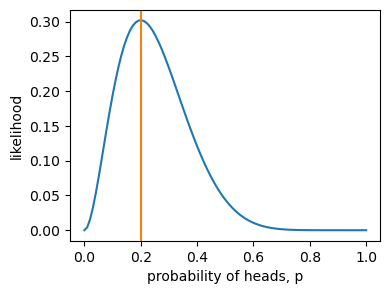

In [6]:
x = np.linspace(0,1,100)
likelihood = tfd.Binomial(10,probs=x).prob(2)

plt.figure(figsize=(4,3))
plt.plot(x,likelihood)
plt.axvline(p.numpy(), c='C1')
plt.xlabel('probability of heads, p')
plt.ylabel('likelihood')
plt.show()

## Example 8 (Finding maximum likelihood with the L-BFGS optimizer)

In [7]:
@tf.function
def loss(p_input):
    N=10
    h=2
    p = tf.nn.sigmoid(p_input)
    likelihood = tfd.Binomial(N,probs=p).log_prob(h)
    return tf.squeeze(-likelihood)

The optimizers offered by tfp have a different requirement to tensorflow’s standard optimizers in that they
require a function that provides the loss function to be minimized and its gradients. There is a built-in
function that facilitates this called tfp.math.value_and_gradient

In [8]:
def loss_and_gradient(p):
    return tfp.math.value_and_gradient(loss ,p)

In [9]:
# set the initial value of p
start = np.array([0.5])
# run the optimizer
results = tfp.optimizer.lbfgs_minimize(loss_and_gradient,
                            initial_position=start,
                            tolerance=1e-8)

In [10]:
print('Optimizer converged: ', results.converged.numpy())

Optimizer converged:  True


In [11]:
# print the optimal transformed value
print(tf.nn.sigmoid(results.position).numpy())

[0.2]
